In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

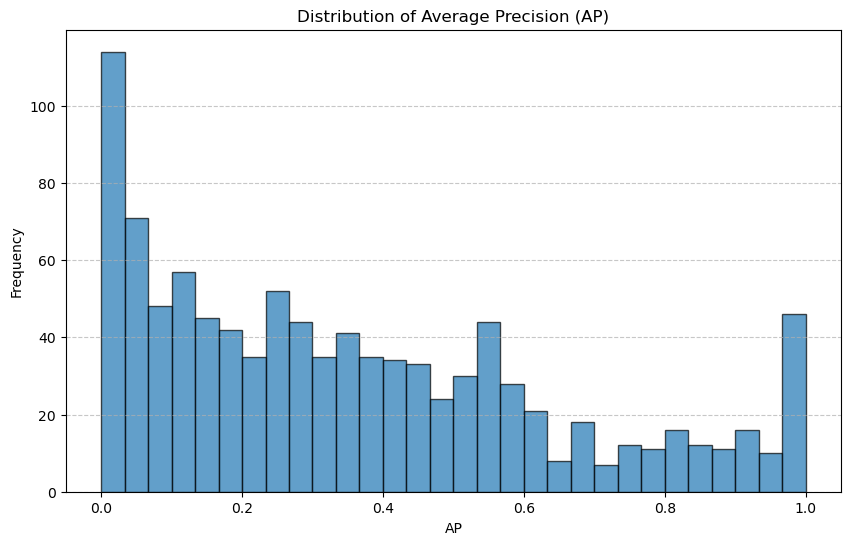

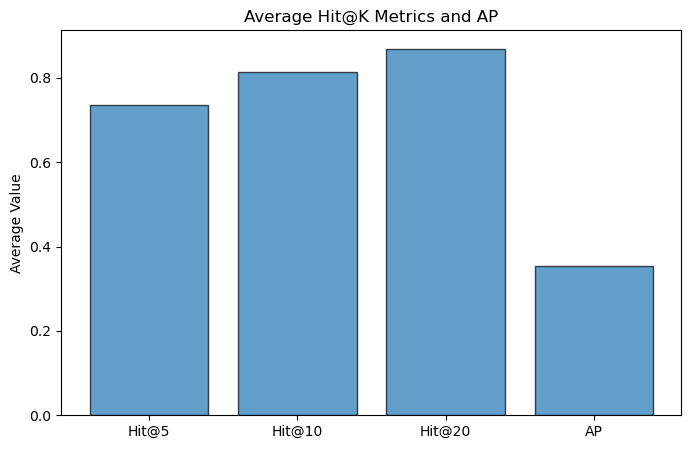

{'Hit@5': 0.735, 'Hit@10': 0.814, 'Hit@20': 0.869, 'AP': 0.35417890651768985}

In [3]:
# Read the metrics
data = pd.read_csv('../src/data/query_level_metrics.csv')

# Calculate mean values for performance metrics
average_metrics = {
    'Hit@5': data['Hit@5'].mean(),
    'Hit@10': data['Hit@10'].mean(),
    'Hit@20': data['Hit@20'].mean(),
    'AP': data['AP'].mean()
}

# Plot 1: Distribution of AP values
plt.figure(figsize=(10, 6))
plt.hist(data['AP'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Average Precision (AP)')
plt.xlabel('AP')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Comparison of Average Hit@K Metrics
plt.figure(figsize=(8, 5))
plt.bar(average_metrics.keys(), average_metrics.values(), alpha=0.7, edgecolor='black')
plt.title('Average Hit@K Metrics and AP')
plt.ylabel('Average Value')
plt.show()

average_metrics

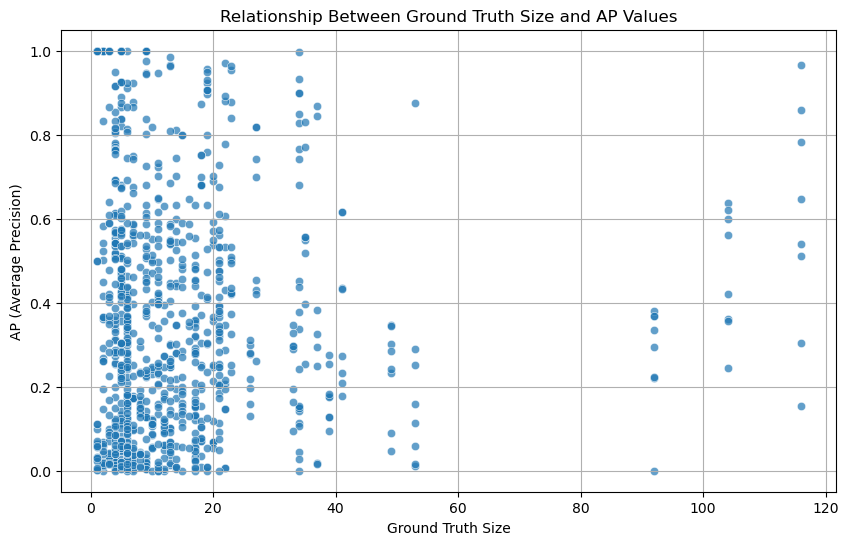

0.03364711022107148

In [5]:
# Plot the relationship between Ground Truth Size and AP values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ground_truth_size', y='AP', data=data, alpha=0.7)
plt.title('Relationship Between Ground Truth Size and AP Values')
plt.xlabel('Ground Truth Size')
plt.ylabel('AP (Average Precision)')
plt.grid(True)
plt.show()

# Calculate correlation between ground truth size and AP
correlation = data['ground_truth_size'].corr(data['AP'])
correlation

In [8]:
# Filter out the top 10 most difficult queries based on AP values
difficult_queries = data.sort_values(by='AP').head(10)

# Print the top 10 most difficult queries
difficult_queries

,query,ground_truth_size,Hit@5,Hit@10,Hit@20,AP
256,我對臺灣海岸的環境保護很感興趣，有什麼課程能夠讓我了解海洋生態、環境政策和海岸開發的平衡嗎？,10,0,0,0,0.0
939,我想學習如何應用大數據和人工智慧於商業分析，是否有實務性的課程或案例分享？,4,0,0,0,0.0
410,想學會實用英語的溝通技巧，有哪些課程可以幫助我提高口語能力？,11,0,0,0,0.0
415,想進一步提高英文溝通能力，哪些課程能夠幫助我提高實際的英語表達能力？,11,0,0,0,0.0
816,我對生物技術很感興趣，有哪些實驗課程可以學習生物分子和細胞的基礎知識？,6,0,0,0,0.0
203,我對全球政治和國際事務很有興趣，哪些課程可以讓我了解不同國家的政治動態和全球化趨勢？,7,0,0,0,0.0
779,我想學習醫學數位微學程，但是有一些課程的內容似乎很複雜，請問有哪些課程適合初學者？,21,0,0,0,0.0
167,想學習透過實用性英語增進溝通能力，但不確定中級課程的難易程度，請教一下適合我的課程有哪些？,12,0,0,0,0.0
49,我想學習海洋休閒運動相關的課程，但不太確定哪些是初學者的好選擇，能給我一些建議嗎？,19,0,0,0,0.0
754,我對智慧城市的發展很有興趣，怎樣才能學到相關的實務應用？,2,0,0,0,0.0


In [12]:
# Load the target data
target_data = pd.read_csv('../src/data/query_target_label_with_tags.csv')

# Perform a left join on the two datasets based on the 'query' column
combined_data = data.merge(target_data, on='query', how='left')

# Move 'tags' column to the second position
cols = list(combined_data.columns)
cols = [cols[0]] + [cols[-1]] + cols[1:-1]
combined_data = combined_data[cols]

# Filter out the top 10 most difficult queries based on AP values
difficult_queries = combined_data.sort_values(by='AP')

# Print the top 10 most difficult queries
difficult_queries.head(10)

,query,tags,ground_truth_size,Hit@5,Hit@10,Hit@20,AP,relative_courses_id
256,我對臺灣海岸的環境保護很感興趣，有什麼課程能夠讓我了解海洋生態、環境政策和海岸開發的平衡嗎？,看見臺灣海岸微學程,10,0,0,0,0.0,"['GEAE2601', 'GEAE2602', 'GEAE2610', 'GEAI1535..."
939,我想學習如何應用大數據和人工智慧於商業分析，是否有實務性的課程或案例分享？,商業數據分析與創新微學程,4,0,0,0,0.0,"['MIS583', 'CM503', 'CM512', 'CM513']"
410,想學會實用英語的溝通技巧，有哪些課程可以幫助我提高口語能力？,實用英語跨域學程,11,0,0,0,0.0,"['GEAI1782', 'GEAIE600', 'GEAIE605', 'GEAIE702..."
415,想進一步提高英文溝通能力，哪些課程能夠幫助我提高實際的英語表達能力？,實用英語跨域學程,11,0,0,0,0.0,"['GEAI1782', 'GEAIE600', 'GEAIE605', 'GEAIE702..."
816,我對生物技術很感興趣，有哪些實驗課程可以學習生物分子和細胞的基礎知識？,生物技術微學程,6,0,0,0,0.0,"['BIOS311', 'MBR211', 'MBR214', 'MBR308', 'MBR..."
203,我對全球政治和國際事務很有興趣，哪些課程可以讓我了解不同國家的政治動態和全球化趨勢？,全球研究學分學程,7,0,0,0,0.0,"['GEAE2336', 'GEAI1665', 'PE132', 'PE302', 'SO..."
779,我想學習醫學數位微學程，但是有一些課程的內容似乎很複雜，請問有哪些課程適合初學者？,基礎醫學數位微學程,21,0,0,0,0.0,"['GEAI1902', 'GEAI1904', 'GEAI1907', 'GEAI1912..."
167,想學習透過實用性英語增進溝通能力，但不確定中級課程的難易程度，請教一下適合我的課程有哪些？,全英語通識教育菁英學程,12,0,0,0,0.0,"['GEAE2143', 'GEAE2332', 'GEAE2336', 'GEAE2431..."
49,我想學習海洋休閒運動相關的課程，但不太確定哪些是初學者的好選擇，能給我一些建議嗎？,永續海洋休閒運動產業學程,19,0,0,0,0.0,"['GEPE203', 'GEPE203A', 'GEPE203B', 'GEPE215',..."
754,我對智慧城市的發展很有興趣，怎樣才能學到相關的實務應用？,環境、社會及公司治理微學程,2,0,0,0,0.0,"['GEAI1652', 'CSS134']"


In [14]:
# Group by 'tags' and calculate the mean AP and Hit@K metrics
grouped_by_tags = combined_data.groupby('tags').agg({
    'ground_truth_size': 'mean',
    'AP': 'mean',
    'Hit@5': 'mean',
    'Hit@10': 'mean',
    'Hit@20': 'mean'
}).reset_index()

# Sort the result by AP to identify the most and least difficult tag groups
grouped_by_tags_sorted = grouped_by_tags.sort_values(by='AP')

# Display the grouped results
grouped_by_tags_sorted

,tags,ground_truth_size,AP,Hit@5,Hit@10,Hit@20
26,國際素養微學程,9.0,0.032108,0.250,0.625,0.750
37,實踐環境教育微學程,3.0,0.043817,0.000,0.000,0.250
23,台灣文化英語微學程,4.0,0.062308,0.125,0.250,0.375
115,金融科技與創新微學程,6.0,0.080075,0.125,0.250,0.625
25,國際漢學微學程,2.0,0.089492,0.125,0.250,0.500
...,...,...,...,...,...,...
123,食品安全學程,4.0,0.826858,1.000,1.000,1.000
63,沉浸式體驗內容應用微學程,1.0,0.875211,0.875,0.875,0.875
117,音場技術與情境感受微學程,1.0,0.882812,0.875,0.875,1.000
120,音樂與高齡照護學程,2.0,0.883115,1.000,1.000,1.000


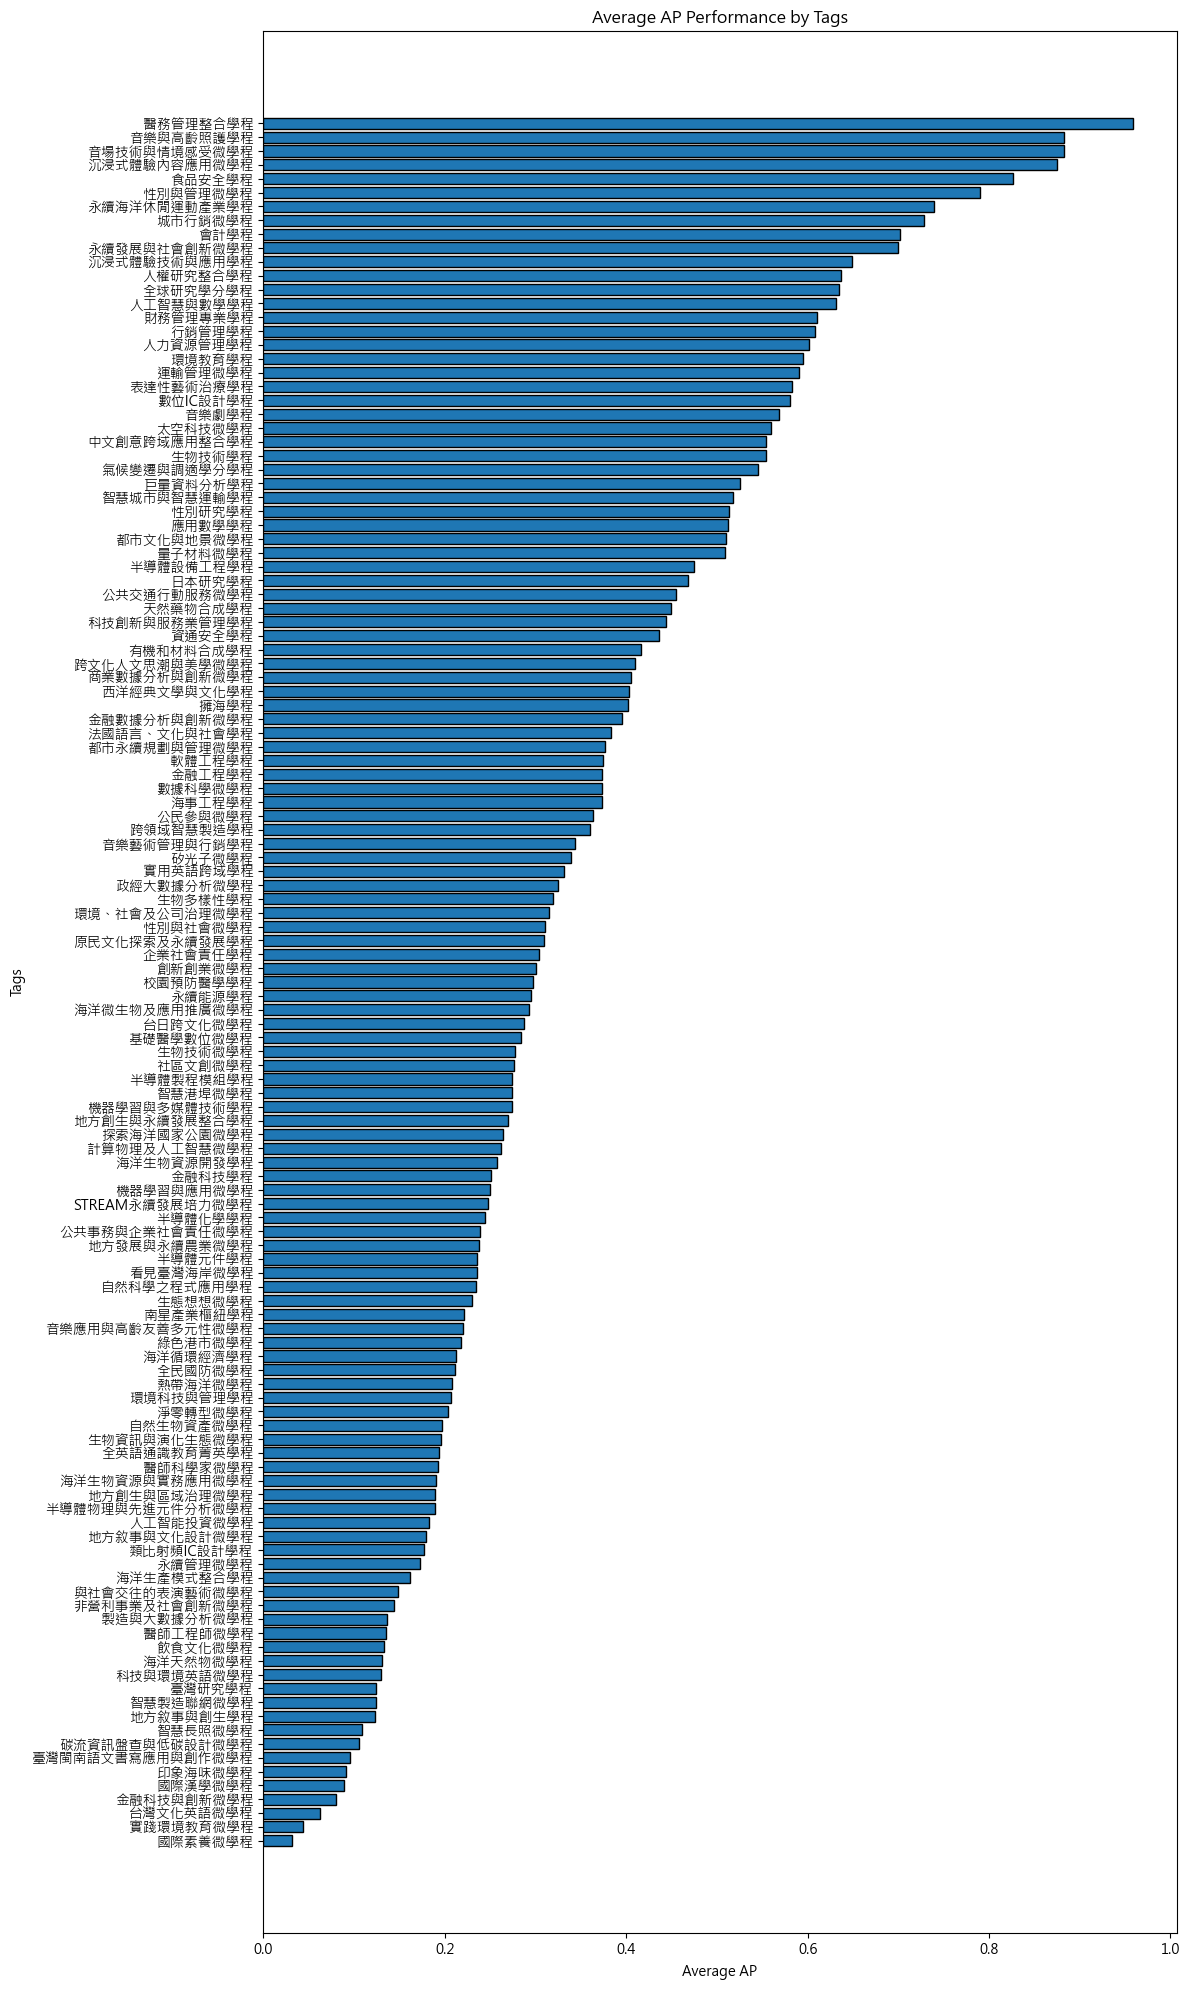

In [21]:
# Config the font for support for Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# Visualize the AP performance by Tags
plt.figure(figsize=(12, 20))
plt.barh(grouped_by_tags_sorted['tags'], grouped_by_tags_sorted['AP'], edgecolor='black')
plt.title('Average AP Performance by Tags')
plt.xlabel('Average AP')
plt.ylabel('Tags')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()